<a href="https://colab.research.google.com/github/mark4335/ML-Diabetes-Analysis/blob/ml-analysis/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pprint
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

# Load your data
# Replace with the actual path to your CSV file
data= pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')


# Select features and target variable
features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
            'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
            'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

target_variable = 'Diabetes_012'

# Extract features and target variable
X = data[features]
y = data[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Accuracy
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Gini Impurity
gini_impurity = 1 - sum((sum(y_train == c) / len(y_train)) ** 2 for c in set(y_train))
print(f"Gini Impurity: {gini_impurity}")

# Information Gain (Assuming a binary classification problem)
root_entropy = -sum((sum(y_train == c) / len(y_train)) * np.log2(sum(y_train == c) / len(y_train)) for c in set(y_train))
information_gain = root_entropy - dt_classifier.tree_.impurity[0]
print(f"Information Gain: {information_gain}")

# Feature Importance
feature_importance = dt_classifier.feature_importances_
feature_importance_dict = dict(zip(features, feature_importance))
print("Feature Importance:")
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance}")

# Visualization of the Decision Tree
# Visualization of the Decision Tree
plt.figure(figsize=(15, 10))
tree.plot_tree(dt_classifier, filled=True, rounded=True)
plt.show()


Accuracy: 0.7673446862188584
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87     42795
         1.0       0.04      0.05      0.04       944
         2.0       0.29      0.33      0.31      6997

    accuracy                           0.77     50736
   macro avg       0.40      0.41      0.41     50736
weighted avg       0.78      0.77      0.77     50736

Gini Impurity: 0.27095106398330915
Information Gain: 0.4395138593855551
Feature Importance:
BMI: 0.1408250092305119
Income: 0.10241303263934987
Age: 0.10239257605996169
PhysHlth: 0.08888973752075109
Education: 0.07931071189907402
MentHlth: 0.06975890732542768
HighBP: 0.0683232893841278
GenHlth: 0.06517033106740637
Smoker: 0.03998097967748588
Fruits: 0.038620925463174416
PhysActivity: 0.03499103651639692
Veggies: 0.030538510662678445
Sex: 0.026643196837903206
DiffWalk: 0.02272355608021895
HeartDiseaseorAttack: 0.018588267724479083
NoDocbcCost: 0.0167286406171878

KeyboardInterrupt: ignored

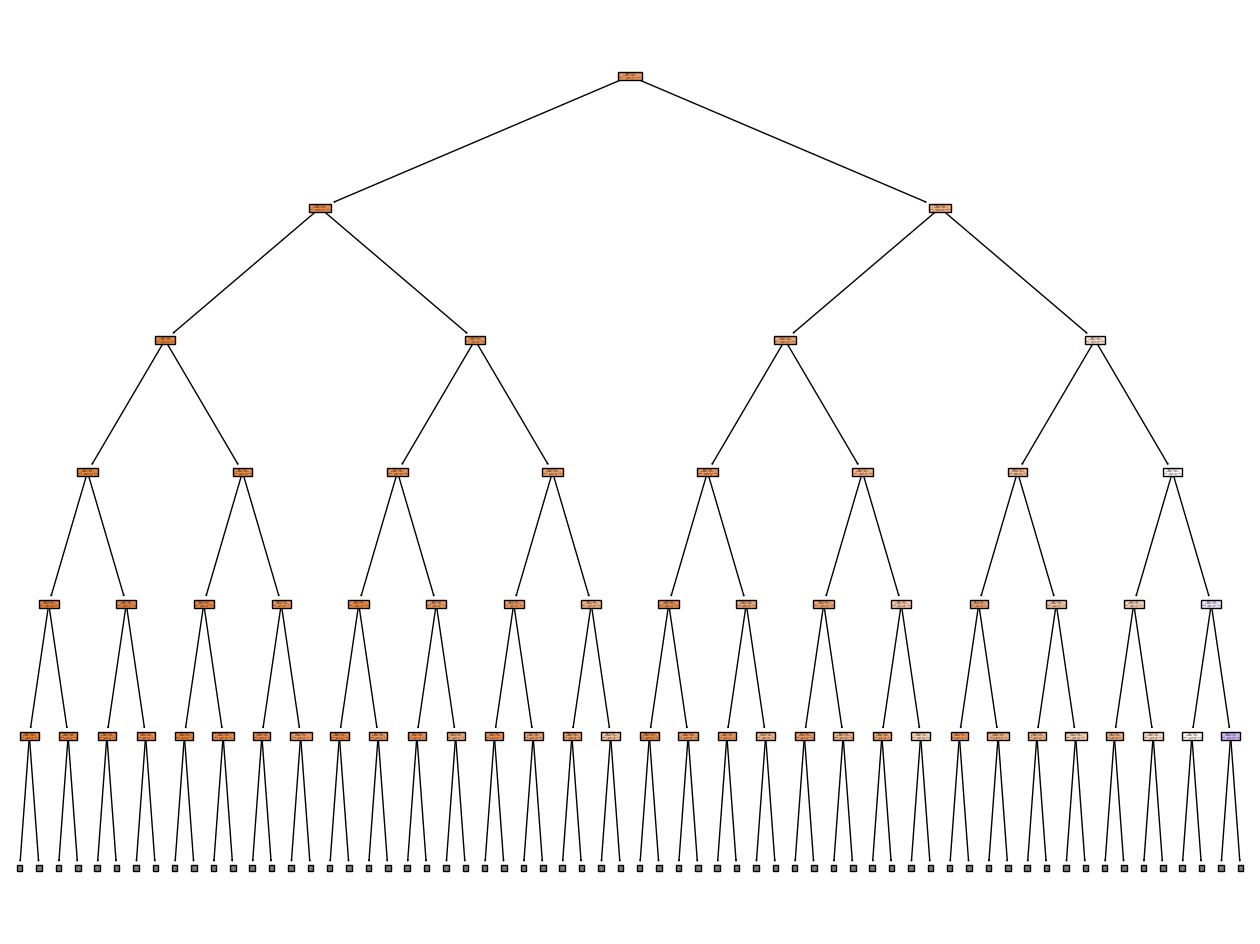

Accuracy of Decision Tree: 0.7671672973825292
Average Mean Squared Error (MSE): 0.810588118364494
Variance of MSE: 1.4587166206031374e-05


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# ... (previous code remains unchanged)

class DecisionTreeClassifierWrapper:
    def __init__(self):
        self.clf = DecisionTreeClassifier(random_state=100)

    def train(self, X_train, y_train):
        self.clf.fit(X_train, y_train)

    def predict(self, X_test):
        return self.clf.predict(X_test)

    def evaluate(self, y_true, y_pred):
        accuracy = metrics.accuracy_score(y_true, y_pred)
        print(f"Accuracy of Decision Tree: {accuracy}")

    def calculate_bias_variance(self, X, y):
        # Perform k-fold cross-validation to estimate bias and variance
        k_fold = 5  # You can adjust the number of folds
        mse_values = cross_val_score(self.clf, X, y, cv=k_fold, scoring='neg_mean_squared_error')

        # Calculate bias and variance
        avg_mse = -np.mean(mse_values)
        variance = np.var(mse_values)

        print(f"Average Mean Squared Error (MSE): {avg_mse}")
        print(f"Variance of MSE: {variance}")

    def plot_impurity(self):
        fig, ax = plt.subplots(figsize=(16, 12))
        plot_tree(self.clf, filled=True, feature_names=features, class_names=list(map(str, self.clf.classes_)), impurity=True, ax=ax, max_depth=5)
        plt.show()

def main():
    # Create an instance of the DecisionTreeClassifierWrapper
    dt_classifier = DecisionTreeClassifierWrapper()

    # Train the classifier
    dt_classifier.train(X_train, y_train)

    # Plot the decision tree with impurity for the first 5 levels
    dt_classifier.plot_impurity()

    # Make predictions on the testing data
    y_pred = dt_classifier.predict(X_test)

    # Evaluate the performance of the classifier
    dt_classifier.evaluate(y_test, y_pred)

    # Calculate bias and variance
    dt_classifier.calculate_bias_variance(X_train, y_train)

if __name__ == "__main__":
    main()


In [ ]:

class DecisionTreeClassifierWrapper:
    def __init__(self):
        self.clf = DecisionTreeClassifier(random_state=100)

    def train(self, X_train, y_train):
        self.clf.fit(X_train, y_train)

    def predict(self, X_test):
        return self.clf.predict(X_test)

    def evaluate(self, y_true, y_pred):
        accuracy = metrics.accuracy_score(y_true, y_pred)
        print(f"Accuracy of Decision Tree: {accuracy}")

    def calculate_bias_variance(self, X, y):
        # Perform k-fold cross-validation to estimate bias and variance
        k_fold = 5  # You can adjust the number of folds
        mse_values = cross_val_score(self.clf, X, y, cv=k_fold, scoring='neg_mean_squared_error')

        # Calculate bias and variance
        avg_mse = -np.mean(mse_values)
        variance = np.var(mse_values)

        print(f"Average Mean Squared Error (MSE): {avg_mse}")
        print(f"Variance of MSE: {variance}")

    def plot_impurity(self):
        fig, ax = plt.subplots(figsize=(10, 8))
        plot_tree(self.clf, filled=True, feature_names=features, class_names=list(map(str, self.clf.classes_)), impurity=True, ax=ax)
        plt.show()

def main():
    # Create an instance of the DecisionTreeClassifierWrapper
    dt_classifier = DecisionTreeClassifierWrapper()

    # Train the classifier
    dt_classifier.train(X_train, y_train)

    # Plot the decision tree with impurity
    dt_classifier.plot_impurity()

    # Make predictions on the testing data
    y_pred = dt_classifier.predict(X_test)

    # Evaluate the performance of the classifier
    dt_classifier.evaluate(y_test, y_pred)

    # Calculate bias and variance
    dt_classifier.calculate_bias_variance(X_train, y_train)

if __name__ == "__main__":
    main()

KeyboardInterrupt: ignored

Gini Impurity: 0.27095106398330915
Entropy: 0.7104649233688642


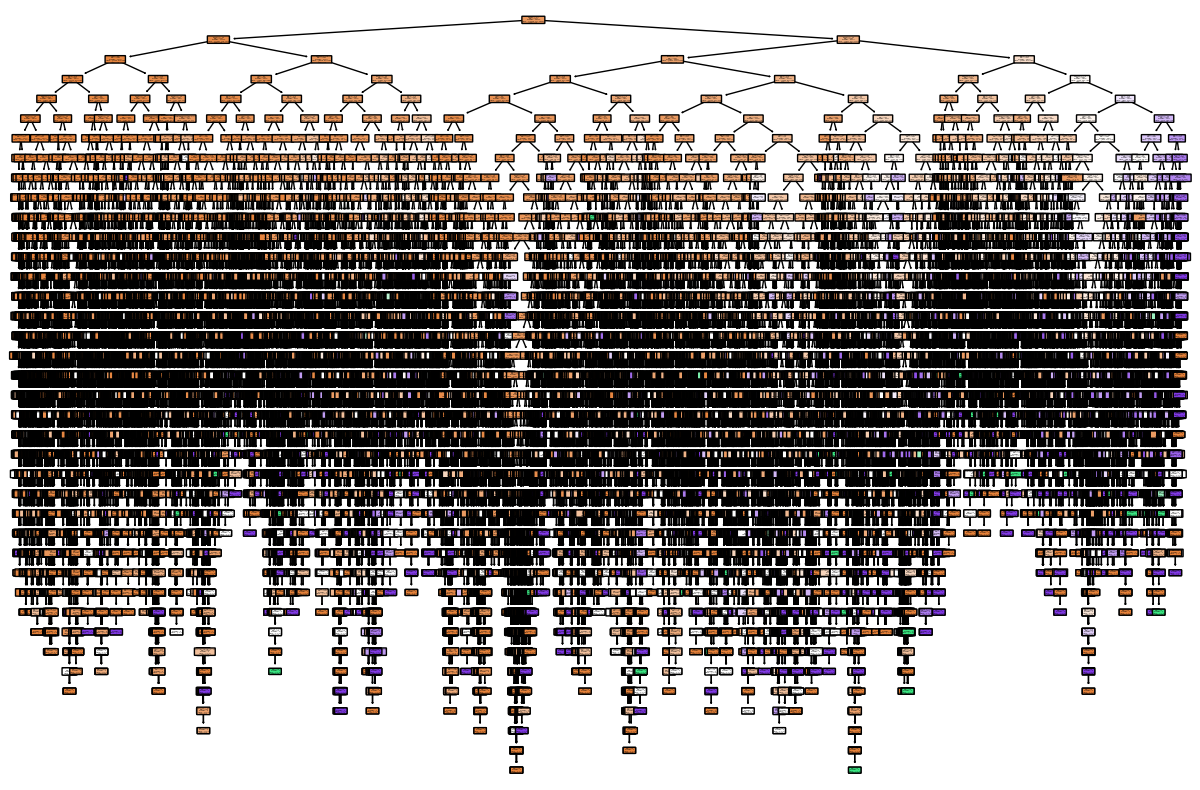

In [ ]:
# Create a DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Gini Impurity
gini_impurity = 1 - sum((sum(y_train == c) / len(y_train)) ** 2 for c in set(y_train))
print(f"Gini Impurity: {gini_impurity}")
k_fold = 5
# Entropy
root_entropy = -sum((sum(y_train == c) / len(y_train)) * np.log2(sum(y_train == c) / len(y_train)) for c in set(y_train))
print(f"Entropy: {root_entropy}")

plt.figure(figsize=(15, 10))
tree.plot_tree(dt_classifier, feature_names=features, class_names=[str(c) for c in sorted(set(y_train))], filled=True, rounded=True)
plt.show()